# INLS 613 Final Project: Fake News

## 1: Data

### 1.1: Read in Data

In [51]:
import pandas as pd
import numpy as np
import scipy

In [52]:
df = pd.read_csv("fake_or_real_news.csv/fake_or_real_news.csv",encoding='utf-8')

In [53]:
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [54]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [55]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [56]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## 2: Split Train and Test Data

### 2.1: Drop Extra Columns from DataFrame

In [57]:
df_x=df.drop(['label'], axis=1)

In [58]:
df_x=df_x.drop(df.columns[0], axis=1)

In [59]:
df_x.head()

,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


### 2.2: Convert Y Labels

In [60]:
from sklearn import preprocessing ### Importing a preprocessor to convert the labels in the target class. 

In [61]:
data_class_y= [ 'FAKE', 'REAL']
le= preprocessing.LabelEncoder()
le.fit(data_class_y)
#y should now be an array of labels where 0 is FAKE and 1 is REAL
y=le.transform(df['label']);

### 2.3: Split Data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, train_size=.8, random_state=5)

## 3: Preprocessing

### 3.1: Downcase

In [64]:
# lower takes in an array of strings and converts every string to all lower case
def lower(arr):
    out=[]
    for i in range(len(arr)):
        out.append(arr[i].lower())
    return out;

### 3.2: Remove Terms (stop words and numbers)

Call functions to remove stop words and downcase. Store results in "processed_text" and "processed_title"

In [65]:
import nltk
from nltk.corpus import stopwords
def remove_stops(s):
    word_list = s.split(" ");
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return " ".join(filtered_words)

def remove_all_stops(a):
    out=[]
    for i in range(len(a)):
        out.append(remove_stops(a[i]))
    return out
def remove_numbers(s):
    out=[]
    for i in s:
        if not i.isdigit():
            out.append(i)
    return "".join(out)

def remove_all_numbers(a):
    out=[]
    for i in range(len(a)):
        out.append(remove_numbers(a[i]))
    return out

In [66]:
remove_stops(remove_numbers("1 adsfasdf 23421, fasd the the"))

' adsfasdf , fasd'

Train:

In [67]:
processed_text= lower(train_x['text'].values)
processed_title = lower(train_x['title'].values)

Test:

In [68]:
test_processed_text= lower(test_x['text'].values)
test_processed_title = lower(test_x['title'].values)

### 3.3 Add Prefix to Title Words and Concat Title and Text

In [69]:
def title_convert(s):
    words = s.split(" ");
    for i in range(len(words)):
        words[i]="title_"+words[i]
    return " ".join(words)

def mult_title_convert(titles):
    new_titles=[]
    for i in range(len(titles)):
        new_titles.append(title_convert(titles[i]))
    return new_titles

def combine_title_text(title, text):
    out=[]
    for i in range(len(text)):
        out.append(title[i]+" "+text[i])
    return out

Train:

In [70]:
#convert titles to have prepended prefix
prefixed_titles=mult_title_convert(processed_title)

In [71]:
#combine preprocesssed prefixed title and preprocessed text
combined_text_title=combine_title_text(prefixed_titles, processed_text)

Test:

In [72]:
#convert titles to have prepended prefix
test_prefixed_titles=mult_title_convert(test_processed_title)

In [73]:
#combine preprocesssed prefixed title and preprocessed text
test_combined_text_title=combine_title_text(test_prefixed_titles, test_processed_text)

## 4: Extract Features

### Feature Functions

In [74]:
def top_n_features(feature_names, n, train_x_array):
    feature_array= np.array(feature_names)
    tfidf_sorting = np.argsort(train_x_array).flatten()[::-1]
    top_n = feature_array[tfidf_sorting][:n]
    return top_n

### 4.0: Feature Sets
1. F1: TFIDF Title
2. F2: TFIDF of Text
3. F3: TFIDF of Concatenated Title and Text 
4. F4: TFIDF of Combined Vectors of Individual TFIDF of Text and Title


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer 

### 4.1: TFIDF Title

The TFIDF Vectorizer of the title should fit and transform the title data that contains no stops.  The title tf vectorizer will be stored in tf_title. The vector of training data will be stored in title_x_tfidf_array

In [76]:
tf_title = TfidfVectorizer(min_df=1,stop_words='english',max_features=50, lowercase=True)
title_x_tfidf = tf_title.fit_transform(processed_title)
title_x_tfidf_array = title_x_tfidf.toarray()
#tf_title.get_feature_names()

In [77]:
top50_title=top_n_features(tf_title.get_feature_names(), 50, title_x_tfidf_array)

In [78]:
top50_title

array(['world', 'debate', 'isis', 'iran', 'house', 'hillary', 'gop', 'fbi',
       'emails', 'email', 'election', 'donald', 'deal', 'won', 'cruz',
       'court', 'comment', 'clinton', 'campaign', 'bush', 'black', 'big',
       'bernie', 'america', 'just', 'media', 'new', 'news', 'wikileaks',
       'white', 'war', 'vote', 'video', 'trump', 'syria', 'state', 'says',
       'sanders', 'russia', 'rubio', 'right', 'republicans', 'republican',
       'presidential', 'president', 'police', 'people', 'party', 'obama',
       '2016'], 
      dtype='<U12')

Test: test set of title transformed with vectorizer:

In [79]:
test_title_x_tfidf = tf_title.transform(test_processed_title)
test_title_x_tfidf_array = test_title_x_tfidf.toarray()

### 4.2: TFIDF of Text

The  Text TFIDF Vectorizer should fit and transform the processed text data.  The text tf vectorizer will be stored in tf_text. The vector of training data will be stored in text_x_tfidf_array

In [80]:
tf_text = TfidfVectorizer(min_df=1,stop_words='english',max_features=50, lowercase=True)
text_x_tfidf = tf_text.fit_transform(processed_text)
text_x_tfidf_array = text_x_tfidf.toarray()
#tf_text.get_feature_names()


In [81]:
top50_text=top_n_features(tf_text.get_feature_names(), 50, text_x_tfidf_array)

In [82]:
top50_text

array(['world', 'war', 'people', 'think', 'just', 'year', 'like', 'don',
       'new', 'america', 'country', 'say', 'way', 'time', 'government',
       'obama', 'did', 'news', 'american', 'states', 'president', 'united',
       'said', 'know', 'told', 'right', 'state', 'percent', 'white',
       'political', 'going', 'make', 'years', 'clinton', 'campaign',
       'democratic', 'donald', 'election', 'party', 'hillary', 'house',
       'media', 'national', 'presidential', 'republican', 'sanders',
       'support', 'trump', 'voters', '2016'], 
      dtype='<U12')

Test: test set of text transformed with vectorizer

In [83]:
test_text_x_tfidf = tf_text.fit_transform(test_processed_text)
test_text_x_tfidf_array = test_text_x_tfidf.toarray()

### 4.3 TFIDF of Concatenated Title and Text

In [84]:
tf_combined = TfidfVectorizer(min_df=1,stop_words='english',max_features=600, lowercase=True)
combined_tfidf = tf_combined.fit_transform(combined_text_title)
combined_tfidf_array = combined_tfidf.toarray()

In [85]:
#tf_combined.get_feature_names()

In [86]:
top50_concat=top_n_features(tf_combined.get_feature_names(), 50, combined_tfidf_array)

In [87]:
top50_concat

array(['world', 'says', 'war', 'health', 'people', 'isn', 'response',
       'global', 'human', 'countries', 'happened', 'look', 'talk',
       'problem', 'million', 'public', 'death', 'doesn', '000', '10',
       'think', 'bad', 've', 'international', 'come', 'just', 'year',
       'kind', 'person', 'means', 'want', 'number', 'race', 'fear', 'like',
       'vice', 'things', 'don', 'better', 'today', 'decades', 'problems',
       'new', 'similar', 'work', 'good', 'need', 'america', 'care',
       'simply'], 
      dtype='<U14')

Test: test concatenated title and text transformed using vectorizer

In [88]:
test_combined_tfidf = tf_combined.fit_transform(test_combined_text_title)
test_combined_tfidf_array = test_combined_tfidf.toarray()

### 4.4 TFIDF  Combined Vectors

In [89]:
combined= np.hstack((title_x_tfidf_array, text_x_tfidf_array))

Test: test title and text tfidf arrays combined

In [90]:
test_combined= np.hstack((test_title_x_tfidf_array, test_text_x_tfidf_array))

### 4.5: Comparing Top 50 Features:

In [91]:
top_shared= set(top50_text)&set(top50_title)

In [125]:
top_shared

{'2016',
 'america',
 'campaign',
 'clinton',
 'donald',
 'election',
 'hillary',
 'house',
 'just',
 'media',
 'new',
 'news',
 'obama',
 'party',
 'people',
 'president',
 'presidential',
 'republican',
 'right',
 'sanders',
 'state',
 'trump',
 'war',
 'white',
 'world'}

In [124]:
len(top_shared)

25

## 5: Training and Testing Models

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [94]:
def metrics(ytrue, ypred):
    print("Accuracy: "+str(accuracy_score(ytrue, ypred)))
    print("Precision: "+str(precision_score(ytrue, ypred)))
    print("Recall: "+str(recall_score(ytrue, ypred)))
    print("Confusion Matrix: ")
    print(confusion_matrix(ytrue,ypred))
          

### 5.1: Naive Bayes

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
def test_nb(trainx, trainy, testx, testy):
    mnb= MultinomialNB(alpha=1)
    mnb.fit(trainx,trainy)
    pred=mnb.predict(testx)
    metrics(testy, pred)

#### 5.1.1: Naive Bayes and F1

In [97]:
test_nb(title_x_tfidf_array, train_y, test_title_x_tfidf_array, test_y )

Accuracy: 0.614048934491
Precision: 0.580022701476
Recall: 0.811111111111
Confusion Matrix: 
[[267 370]
 [119 511]]


#### 5.1.2: Naive Bayes and F2

In [98]:
test_nb(text_x_tfidf_array, train_y, test_text_x_tfidf_array, test_y )

Accuracy: 0.753749013418
Precision: 0.74237804878
Recall: 0.773015873016
Confusion Matrix: 
[[468 169]
 [143 487]]


#### 5.1.3: Naive Bayes and F3

In [99]:
test_nb(combined_tfidf_array, train_y, test_combined_tfidf_array, test_y )

Accuracy: 0.704025256511
Precision: 0.672998643148
Recall: 0.787301587302
Confusion Matrix: 
[[396 241]
 [134 496]]


#### 5.1.4: Naive Bayes and F4

In [100]:
test_nb(combined, train_y, test_combined, test_y )

Accuracy: 0.791633780584
Precision: 0.787735849057
Recall: 0.795238095238
Confusion Matrix: 
[[502 135]
 [129 501]]


### 5.2: Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
def test_forest(trainx, trainy, testx, testy):
    forest = RandomForestClassifier(max_depth=10,n_estimators=100,min_samples_leaf=2)
    forest.fit(trainx,trainy)
    pred=forest.predict(testx)
    metrics(testy, pred)

#### 5.2.1: Random Forest and F1

In [103]:
test_forest(title_x_tfidf_array, train_y, test_title_x_tfidf_array, test_y )

Accuracy: 0.699289660616
Precision: 0.871641791045
Recall: 0.463492063492
Confusion Matrix: 
[[594  43]
 [338 292]]


#### 5.2.2: Random Forest and F2

In [104]:
test_forest(text_x_tfidf_array, train_y, test_text_x_tfidf_array, test_y )

Accuracy: 0.807419100237
Precision: 0.862781954887
Recall: 0.728571428571
Confusion Matrix: 
[[564  73]
 [171 459]]


#### 5.2.3: Random Forest and F3

In [105]:
test_forest(combined_tfidf_array, train_y, test_combined_tfidf_array, test_y )

Accuracy: 0.69771112865
Precision: 0.69823434992
Recall: 0.690476190476
Confusion Matrix: 
[[449 188]
 [195 435]]


#### 5.2.4: Random Forest and F4

In [106]:
test_forest(combined, train_y, test_combined, test_y )

Accuracy: 0.820836621942
Precision: 0.865698729583
Recall: 0.757142857143
Confusion Matrix: 
[[563  74]
 [153 477]]


### 5.3: Logistic Regression

In [107]:

from sklearn.linear_model import LogisticRegression


In [108]:
def test_log_reg(trainx, trainy, testx, testy):
    log = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
    log.fit(trainx,trainy)
    pred=log.predict(testx)
    metrics(testy, pred)

#### 5.3.1: Logistic Regression and F1

In [109]:
test_log_reg(title_x_tfidf_array, train_y, test_title_x_tfidf_array, test_y )

Accuracy: 0.718232044199
Precision: 0.757062146893
Recall: 0.638095238095
Confusion Matrix: 
[[508 129]
 [228 402]]


#### 5.3.2: Logistic Regression and F2

In [110]:
test_log_reg(text_x_tfidf_array, train_y, test_text_x_tfidf_array, test_y )

Accuracy: 0.809786898185
Precision: 0.832478632479
Recall: 0.773015873016
Confusion Matrix: 
[[539  98]
 [143 487]]


#### 5.3.3: Logistic Regression and F3

In [111]:
test_log_reg(combined_tfidf_array, train_y, test_combined_tfidf_array, test_y )

Accuracy: 0.672454617206
Precision: 0.660208643815
Recall: 0.703174603175
Confusion Matrix: 
[[409 228]
 [187 443]]


#### 5.3.4: Logistic Regression and F4

In [112]:
test_log_reg(combined, train_y, test_combined, test_y )

Accuracy: 0.850039463299
Precision: 0.867892976589
Recall: 0.82380952381
Confusion Matrix: 
[[558  79]
 [111 519]]


### 5.4: SVM

In [113]:
from sklearn import svm
from sklearn.svm import SVC

In [114]:
def test_svm(trainx, trainy, testx, testy):
    svm= SVC(gamma='auto')
    svm.fit(trainx,trainy)
    pred=svm.predict(testx)
    metrics(testy, pred)

#### 5.4.1: SVM and F1

In [115]:
test_svm(title_x_tfidf_array, train_y, test_title_x_tfidf_array, test_y )

Accuracy: 0.711128650355
Precision: 0.767206477733
Recall: 0.601587301587
Confusion Matrix: 
[[522 115]
 [251 379]]


#### 5.4.2: SVM and F2

In [116]:
test_svm(text_x_tfidf_array, train_y, test_text_x_tfidf_array, test_y )

Accuracy: 0.785319652723
Precision: 0.809688581315
Recall: 0.742857142857
Confusion Matrix: 
[[527 110]
 [162 468]]


#### 5.4.3: SVM and F3

In [117]:
test_svm(combined_tfidf_array, train_y, test_combined_tfidf_array, test_y )

Accuracy: 0.497237569061
Precision: 0.497237569061
Recall: 1.0
Confusion Matrix: 
[[  0 637]
 [  0 630]]


#### 5.4.4: SVM and F4

In [118]:
test_svm(combined, train_y, test_combined, test_y )

Accuracy: 0.801104972376
Precision: 0.82252559727
Recall: 0.765079365079
Confusion Matrix: 
[[533 104]
 [148 482]]


## 6: Visualizations

In [119]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [120]:

#### Wordcloud for all titles


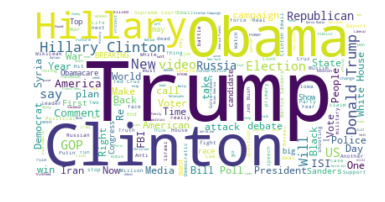

<Figure size 1440x720 with 0 Axes>

In [121]:

title_text = " ".join(title for title in df.title)
title_wordcloud = WordCloud(max_font_size=100,background_color="white").generate(title_text)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(20,10) )
plt.show()
title_wordcloud.to_file("title.png")


In [122]:

### Wordcloud


In [123]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
:
#### Wordcloud for all titles
:
title_text = " ".join(title for title in df.title)
stopwords = set(STOPWORDS)
title_wordcloud = WordCloud(stopwords=stopwords,max_words=100, background_color="white").generate(title_text)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
title_wordcloud.to_file("title.png")
:
#### Wordcloud for text
:
text = " ".join(text for text in df.text)
stopwords = set(STOPWORDS)
text_wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
text_wordcloud.to_file("text.png")
#### Wordcloud for all

title_and_text = title_text + text
stopwords = set(STOPWORDS)
all_wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(title_and_text)
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
text_wordcloud.to_file("all.png")

SyntaxError: invalid syntax (<ipython-input-123-2c212a9cf11f>, line 4)